# Fourier Tranform 101
Here I try to figure out how to work with Fourier Transforms.

In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
import math
% matplotlib inline

In [2]:
# create a basic signal: y = A * sin(x + phase) + offset
def sinSignal(x=np.arange(5), amp=1, freq=1, phase=0, offset=0, isGon=False):
    """
    isGon=True -> is in angular units (e.g. x range in 0-2pi)
    > returns y = np.sin( (freq * x) + phase) + offset
    isGon=False -> is in arbitrary units
    > returns y = np.sin( (2 * np.pi * freq * x / SR) + phase) + offset
    """
    #T = np.max(x)-np.min(x)
    if isGon: return amp * np.sin( (freq * x) + phase) + offset
    #print('returning signal with actual frequency = {} Hz'.format(freq/(x[-1]-x[0])))
    return amp * np.sin( (2 * np.pi * freq * x) + phase) + offset

# returns subrage of values
def getZoom(x, y, xmin, xmax):
    """
    x, y are np arrays with same shape.
    returns values of x and y for xmin < x < xmax
    """
    x_zoom = x[ (x > xmin) & (x < xmax) ]
    y_zoom = y[ (x > xmin) & (x < xmax) ]
    print('zoomed on {0} frequencies out of {1}'.format(x_zoom.shape[0], x.shape[0]))
    return x_zoom, y_zoom

## Step 0: the very basic
Start with a very basic sinusoidal signal.

In [3]:
sampling = .1
x = np.arange(0, 100+sampling, sampling)
f0 = 1
y0 = sinSignal(amp=10, x=x, freq=f0, isGon=False)

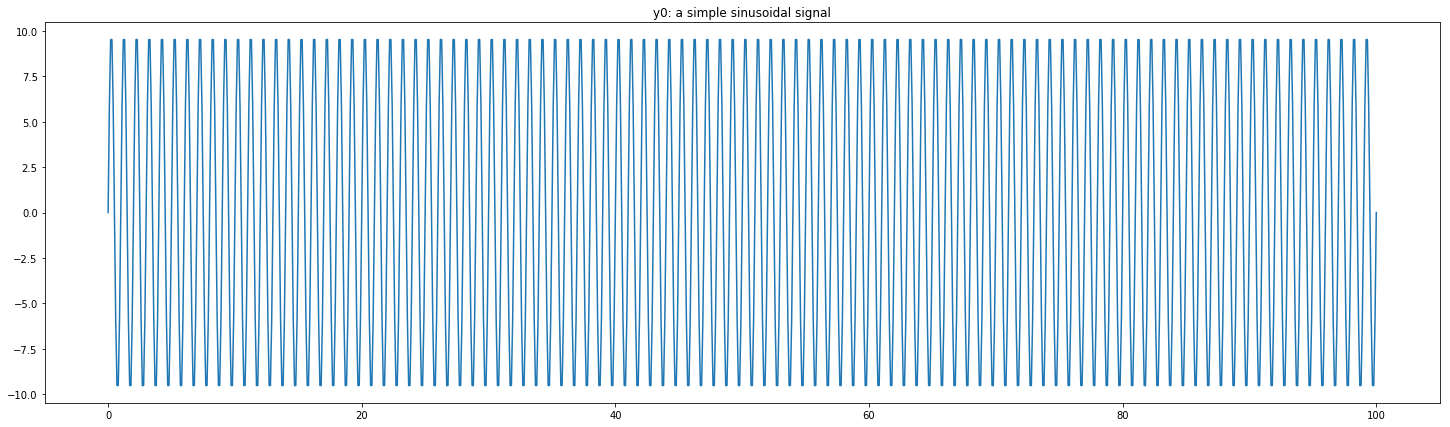

In [4]:
plt.figure(figsize=(25,7))
plt.title('y0: a simple sinusoidal signal')
plt.plot(x, y0)

In [5]:
# now compute FT
y0_hat = np.fft.fft(y0)
freq = np.fft.fftfreq(x.shape[0], sampling)
freq_sp = fftpack.fftfreq(x.shape[0], sampling)

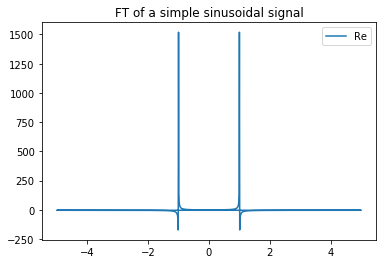

In [6]:
plt.figure()
plt.title('FT of a simple sinusoidal signal')
plt.plot(freq, y0_hat.real, label='Re')
plt.legend(loc='best')

In [7]:
freq_zoom, y0_hat_zoom = getZoom(freq, y0_hat, -2*f0, 2*f0)

zoomed on 401 frequencies out of 1001


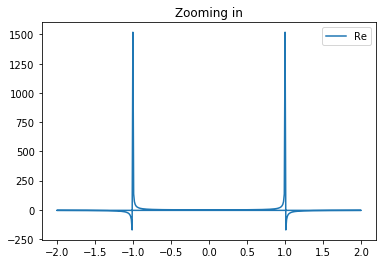

In [8]:
plt.figure()
plt.title('Zooming in')
plt.plot(freq_zoom, y0_hat_zoom.real, label='Re')
plt.legend(loc='best')

The basics seem to make sense :).
In the frequency domain there are two spikes, symmetric around zero - this is a known effect.

## Step 1: "composite" signal
Start from a signal made up of different sinusoidal components.

In [9]:
fa = .5
ya = sinSignal(x=x, amp=5, freq=fa, phase=0, offset=0)
fb = 1.2
yb = sinSignal(x=x, amp=3, freq=fb, phase=10, offset=2)

y1 = ya + yb

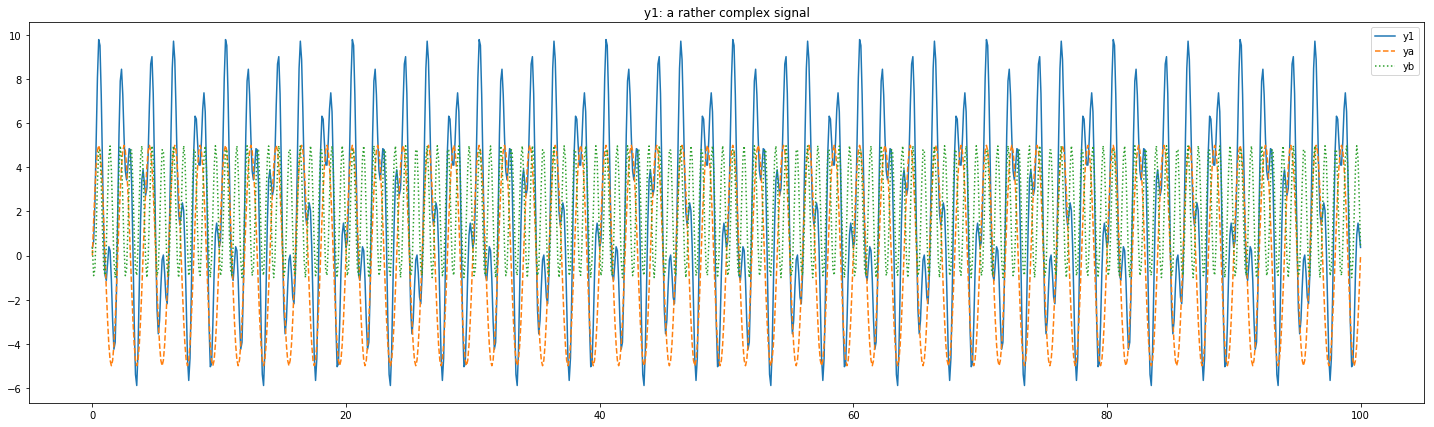

In [10]:
plt.figure(figsize=(25,7))
plt.title('y1: a rather complex signal')
plt.plot(x, y1, label='y1')
plt.plot(x, ya, linestyle='--', label='ya')
plt.plot(x, yb, linestyle=':', label='yb')
plt.legend(loc='best')

In [11]:
y1_hat = np.fft.fft(y1)
ya_hat = np.fft.fft(ya)
yb_hat = np.fft.fft(yb)
freq = np.fft.fftfreq(x.shape[0], sampling)

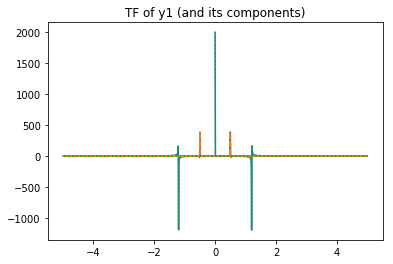

In [12]:
plt.figure()
plt.title('TF of y1 (and its components)')
plt.plot(freq, y1_hat.real, label='y1_hat')
plt.plot(freq, ya_hat.real, linestyle='--', label='ya_hat')
plt.plot(freq, yb_hat.real, linestyle=':', label='yb_hat')

zoomed on 481 frequencies out of 1001
zoomed on 481 frequencies out of 1001
zoomed on 481 frequencies out of 1001


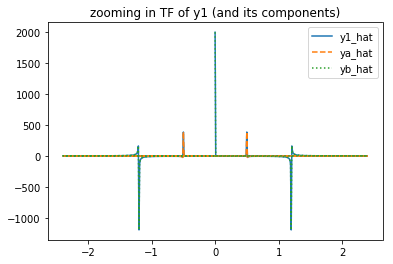

In [13]:
xmin = -2 * max(fa,fb)
xmax = 2 * max(fa,fb)
freq_zoom, y1_hat_zoom = getZoom(freq, y1_hat, xmin, xmax)
freq_zoom, ya_hat_zoom = getZoom(freq, ya_hat, xmin, xmax)
freq_zoom, yb_hat_zoom = getZoom(freq, yb_hat, xmin, xmax)

plt.figure()
plt.title('zooming in TF of y1 (and its components)')
plt.plot(freq_zoom, y1_hat_zoom.real, label='y1_hat')
plt.plot(freq_zoom, ya_hat_zoom.real, linestyle='--', label='ya_hat')
plt.plot(freq_zoom, yb_hat_zoom.real, linestyle=':', label='yb_hat')
plt.legend(loc='best')

The peak at 0 should be due to offsets along the y axis (the continuous component). Let's remove it and try again.

In [14]:
y1_clean = y1 - np.mean(y1)
ya_clean = ya - np.mean(ya)
yb_clean = yb - np.mean(yb)

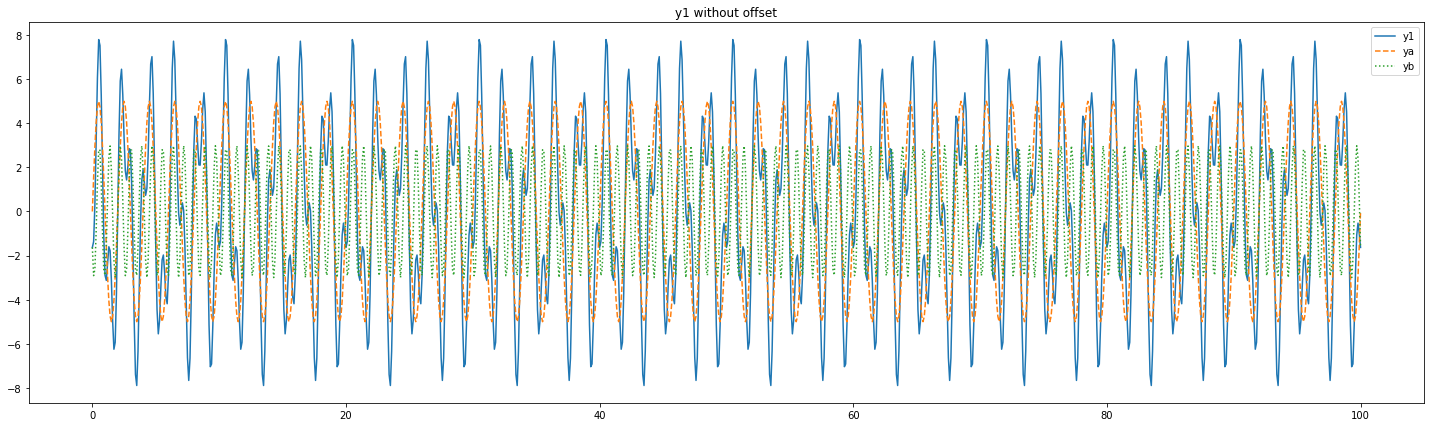

In [15]:
plt.figure(figsize=(25,7))
plt.title('y1 without offset')
plt.plot(x, y1_clean, label='y1')
plt.plot(x, ya_clean, linestyle='--', label='ya')
plt.plot(x, yb_clean, linestyle=':', label='yb')
plt.legend(loc='best')

In [16]:
y1_clean_hat = np.fft.fft(y1_clean)
ya_clean_hat = np.fft.fft(ya_clean)
yb_clean_hat = np.fft.fft(yb_clean)

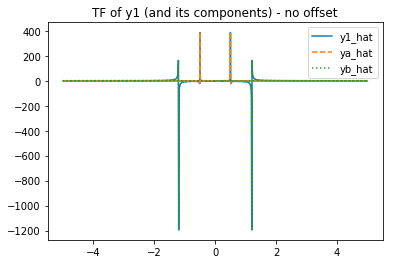

In [17]:
plt.title('TF of y1 (and its components) - no offset')
plt.plot(freq, y1_clean_hat.real, label='y1_hat')
plt.plot(freq, ya_clean_hat.real, linestyle='--', label='ya_hat')
plt.plot(freq, yb_clean_hat.real, linestyle=':', label='yb_hat')
plt.legend(loc='best')

It is how we expected it to be :)

### Apply a filter
Now try to filter out one of the two components and to transform the new signal back into the time domain. Let's try to kill `ya`.

In [18]:
# here the cleaning has to be done by hand and the value of the frequency has to be hard-coded
# since the parameters of ya and yb may be changed above
y1_clean_hat_filter = y1_clean_hat.copy()
fcut = (fa + fb) / 2
y1_clean_hat_filter[ (np.abs(freq) < fcut) ] = 0.

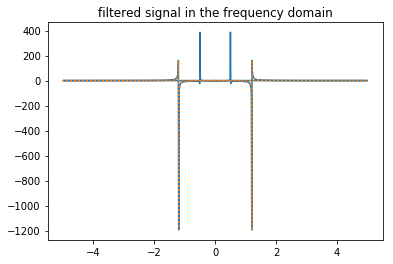

In [19]:
plt.figure()
plt.title('filtered signal in the frequency domain')
plt.plot(freq, y1_clean_hat.real)
plt.plot(freq, y1_clean_hat_filter.real, linestyle=':')

In [20]:
y1_clean_filter = np.fft.ifft(y1_clean_hat_filter)

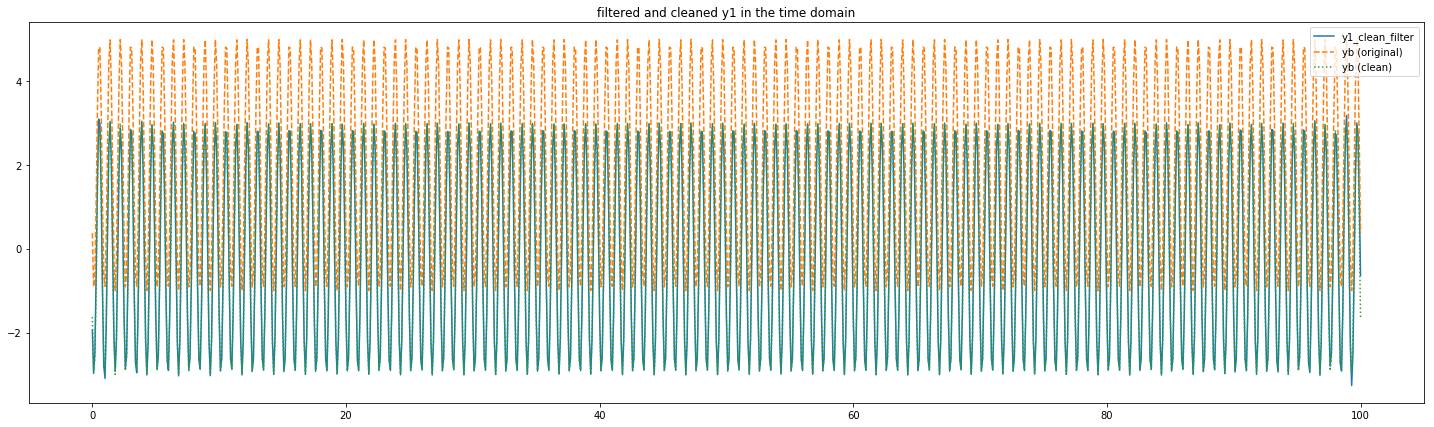

In [21]:
plt.figure(figsize=(25,7))
plt.title('filtered and cleaned y1 in the time domain')
plt.plot(x, y1_clean_filter.real, label='y1_clean_filter')
plt.plot(x, yb, linestyle='--', label='yb (original)')
plt.plot(x, yb_clean, linestyle=':', label='yb (clean)')
plt.legend(loc='best')

## Step 2: non-infinite signal
Take a sinusoidal signal and combine it with a dumping term (e.g. exponential).

In [22]:
sampling = .01
x = np.arange(-3, 3+sampling, sampling)

In [23]:
fc = 2
yc = sinSignal(x=x, amp=2, freq=fc, phase=0, offset=0)
y2 = yc * np.exp(-1 * x*x)

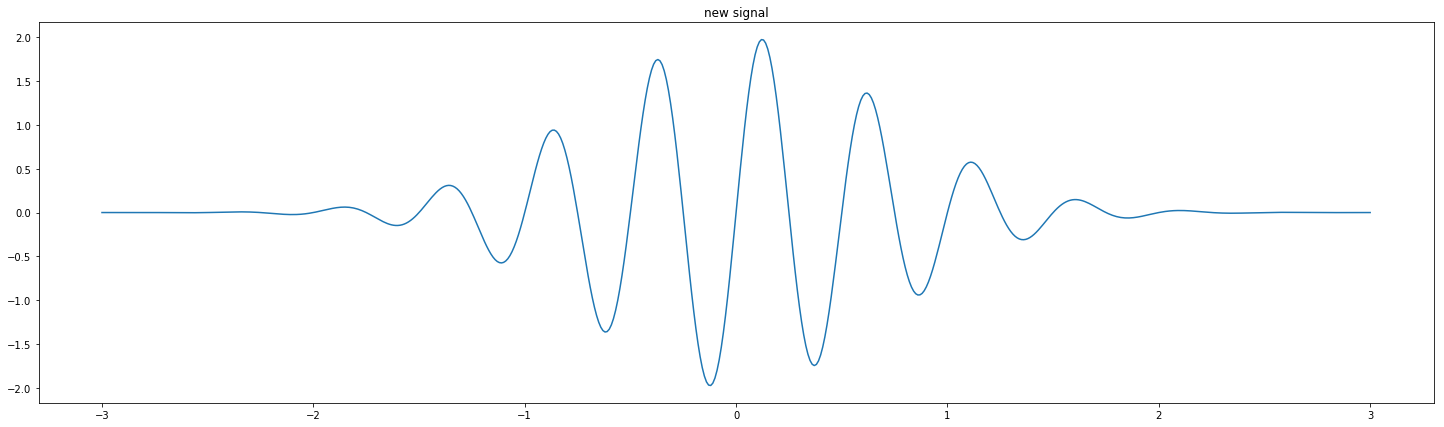

In [24]:
plt.figure(figsize=(25,7))
plt.title('new signal')
plt.plot(x, y2)

In [25]:
y2_hat = np.fft.fft(y2)
freq = np.fft.fftfreq(x.shape[0], sampling)

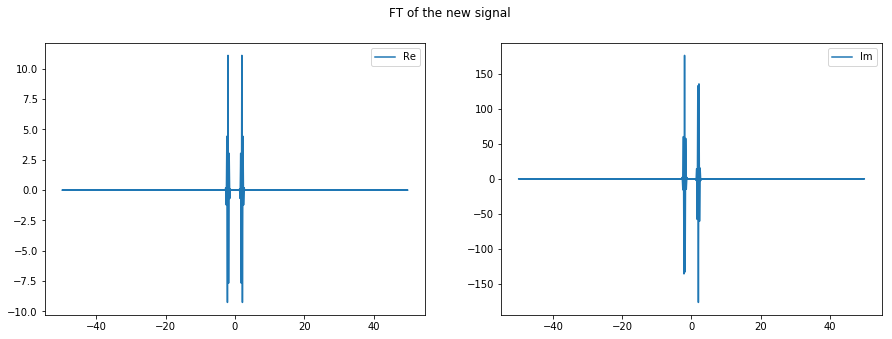

In [26]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('FT of the new signal')
axs[0].plot(freq, y2_hat.real, label='Re')
axs[0].legend()
axs[1].plot(freq, y2_hat.imag, label='Im')
axs[1].legend()

In [27]:
freq_zoom, y2_hat_zoom = getZoom(freq, y2_hat, 0, 2*fc)

zoomed on 24 frequencies out of 601


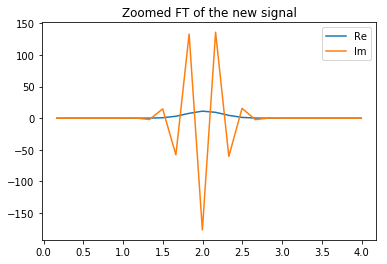

In [28]:
plt.figure()
plt.title('Zoomed FT of the new signal')
plt.plot(freq_zoom, np.abs(y2_hat_zoom.real), label='Re')
plt.plot(freq_zoom, y2_hat_zoom.imag, label='Im')
plt.legend(loc='best')

Retrieve amplitutes and phases to reconstruct the original signal by hand (cfr [this](https://stackoverflow.com/questions/28618591/numpy-fft-what-is-the-return-value-amplitude-phase-shift-or-angle)).

i = 9 freq = 1.4975041597337773 amp = 0.024405031590367957 phase (units of pi) = 0.5
i = 10 freq = 1.6638935108153081 amp = 0.09670794426010426 phase (units of pi) = -0.5
i = 11 freq = 1.8302828618968388 amp = 0.2219469497539256 phase (units of pi) = 0.5
i = 12 freq = 1.9966722129783696 amp = 0.29487918207391783 phase (units of pi) = -0.5
i = 13 freq = 2.1630615640599005 amp = 0.22685207861303294 phase (units of pi) = 0.5
i = 14 freq = 2.329450915141431 amp = 0.10102959073538922 phase (units of pi) = -0.5
i = 15 freq = 2.495840266222962 amp = 0.026059303395836706 phase (units of pi) = 0.5
i = 586 freq = -2.495840266222962 amp = 0.026059303395836706 phase (units of pi) = -0.5
i = 587 freq = -2.329450915141431 amp = 0.10102959073538922 phase (units of pi) = 0.5
i = 588 freq = -2.1630615640599005 amp = 0.22685207861303294 phase (units of pi) = -0.5
i = 589 freq = -1.9966722129783696 amp = 0.29487918207391783 phase (units of pi) = 0.5
i = 590 freq = -1.8302828618968388 amp = 0.221946949753

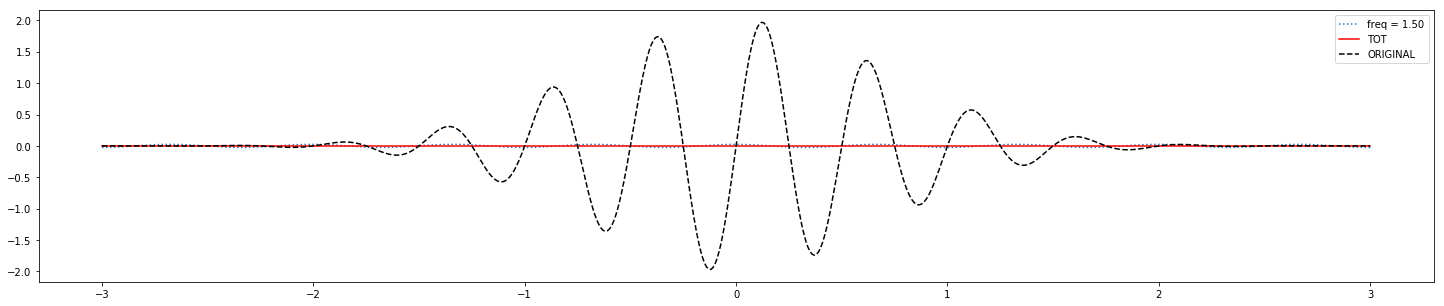

In [29]:
N = x.shape[0]
amps = np.abs( 1./N * np.abs(y2_hat) )
phases = np.angle( y2_hat )

plt.figure(figsize=(25,5))
y2_tot = 0
for i, (fre, amp, phase) in enumerate(zip(freq, amps, phases)):
    #print(fre, amp, phase)
    if amp < .01 : continue
    #if fre < 0: continue
    #print(fre, amp, phase)
    print('i = {3} freq = {0} amp = {1} phase (units of pi) = {2:.1f}'.format(fre,amp,phase/math.pi,i))
    y_tmp = sinSignal(x=x, amp=amp, freq=fre, phase=phase, offset=0)
    if i==9: plt.plot(x, y_tmp, linestyle=':', label='freq = {:.2f}'.format(fre))
    y2_tot += y_tmp
plt.plot(x, y2_tot, color='r', label='TOT')
plt.plot(x, y2, color='k', linestyle='--', label='ORIGINAL')
#plt.plot(x, fftpack.ifft(y2_hat).real, label='ifft')
plt.legend(loc='best')

The above is not working. The reason of this is that the original signal is not periodic and this makes the imaginary part of the frequency domain become very important. On the other hand, when we go back to the time domain we use a linear combination of sines in a strictly real space, and this breaks the "back-translation".

Try instead to filter out some components in the frequency domain and take an inverse FFT of the remaining. Let's see how this will get closer and closer to the original signal.

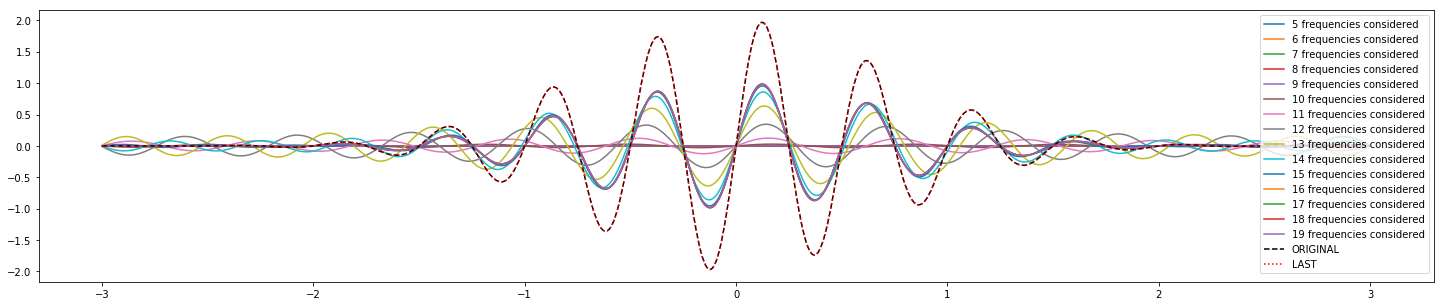

In [30]:
N = freq.shape[0]

plt.figure(figsize=(25,5))
y_last = 0
for i in range(N):
    if i < 5 : continue
    y2_hat_tmp = y2_hat.copy()
    y2_hat_tmp[i:] = 0.
    y2_tmp = fftpack.ifft(y2_hat_tmp)
    y_last = y2_tmp
    if i < 20: plt.plot(x, y2_tmp.real, label='{} frequencies considered'.format(i))
plt.plot(x, y2, color='k', linestyle='--', label='ORIGINAL')
plt.plot(x, y_last.real, color='r', linestyle=':', label='LAST')
plt.legend(loc='best')

## Step 3: long signal
Now consider a "long" signal which lasts more than the measurement time, i.e. the period (if any) is longer than the time in which the signal is probed

In [31]:
sampling = 0.01
x = np.arange(0,100,sampling)
f3 = 0.005
y3 = sinSignal(x=x,amp=5,freq=f3, phase=500, offset=0)

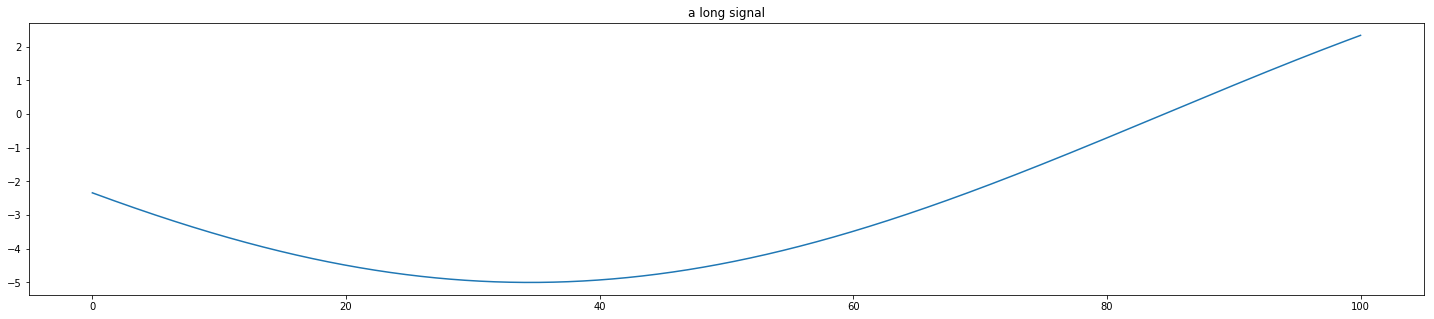

In [32]:
plt.figure(figsize=(25,5))
plt.title("a long signal")
plt.plot(x, y3)

In [33]:
# clean a possible offset
y3_clean = y3 - np.mean(y3)

In [34]:
y3_hat = np.fft.fft(y3_clean)
freq = np.fft.fftfreq(x.shape[0], sampling)

zoomed on 19 frequencies out of 10000


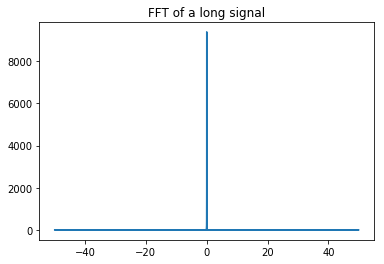

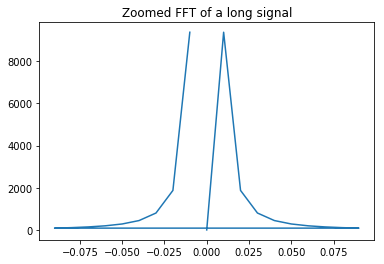

In [35]:
plt.figure()
plt.title('FFT of a long signal')
plt.plot(freq, y3_hat.real)

freq_zoom, y3_hat_zoom = getZoom(freq, y3_hat, -.1, .1)
plt.figure()
plt.title('Zoomed FFT of a long signal')
plt.plot(freq_zoom, y3_hat_zoom.real)

OK, the right frequency is found. 

## Step 4: a non sinusoidal signal
Let's now try to do the same as in Step 3, but with a quadratic signal instead of a sinusoidal signal.

In [36]:
sampling = 0.01
x = np.arange(0,100,sampling)
y4 = (x**2 - 70*x - 50)/1000

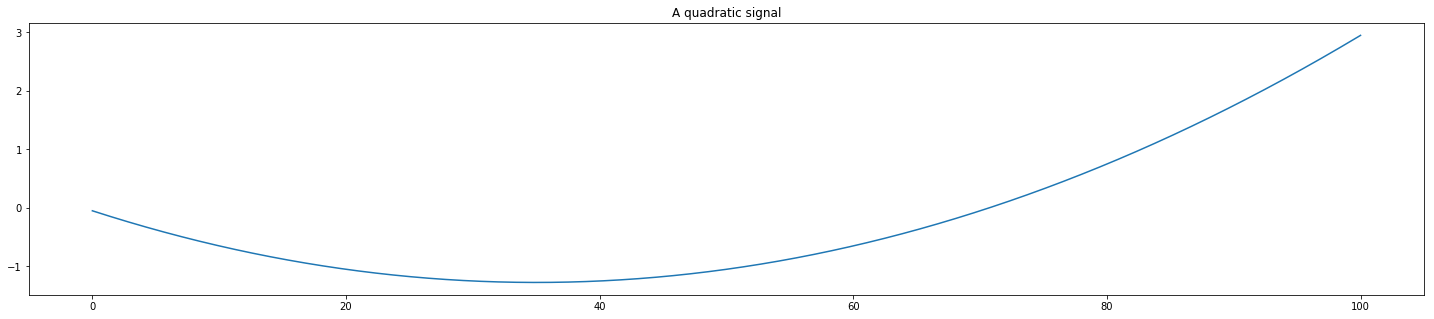

In [37]:
plt.figure(figsize=(25,5))
plt.title('A quadratic signal')
plt.plot(x, y4)

In [38]:
# remove a possible offset
y4_clean = y4 - np.mean(y4)

In [39]:
y4_hat = np.fft.fft(y4_clean)
freq = np.fft.fftfreq(x.shape[0], sampling)

zoomed on 199 frequencies out of 10000


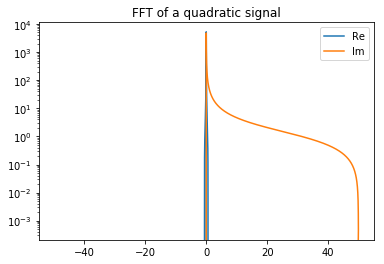

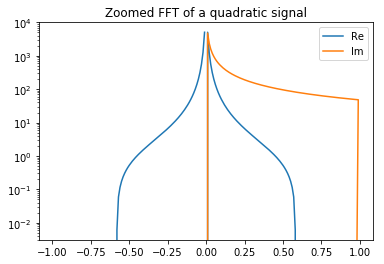

In [40]:
plt.figure()
plt.title('FFT of a quadratic signal')
plt.plot(freq, y4_hat.real, label='Re')
plt.plot(freq, y4_hat.imag, label='Im')
plt.legend(loc='best')
plt.yscale('log')

freq_zoom, y4_hat_zoom = getZoom(freq, y4_hat, -1, 1)
plt.figure()
plt.title('Zoomed FFT of a quadratic signal')
plt.plot(freq_zoom, y4_hat_zoom.real, label='Re')
plt.plot(freq_zoom, y4_hat_zoom.imag, label='Im')
plt.legend(loc='best')
plt.yscale('log')

Now try to progressively rebuild the original signal.

10000


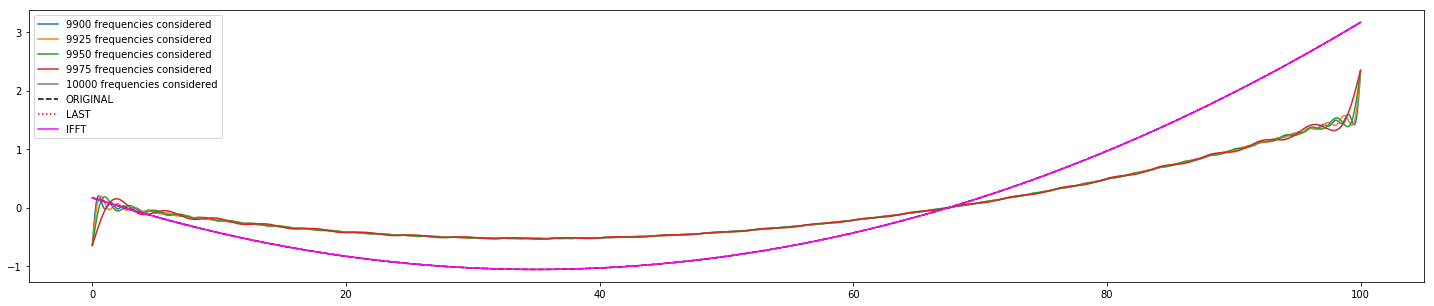

In [41]:
N = freq.shape[0]
print(N)

plt.figure(figsize=(25,5))
y_last = 0
for i in np.arange(0,N+1,25):
    if i < 9900: continue
    y4_hat_tmp = y4_hat.copy()
    y4_hat_tmp[i:] = 0.
    y4_tmp = fftpack.ifft(y4_hat_tmp)
    y_last = y4_tmp
    plt.plot(x, y4_tmp.real, label='{} frequencies considered'.format(i))
plt.plot(x, y4_clean, color='k', linestyle='--', label='ORIGINAL')
plt.plot(x, y_last.real, color='r', linestyle=':', label='LAST')
plt.plot(x, np.fft.ifft(y4_hat).real, color='magenta', label='IFFT')
plt.legend(loc='best')

It seems that the last few frequencies have a strong impact on the overall reconstruction of the original signal.

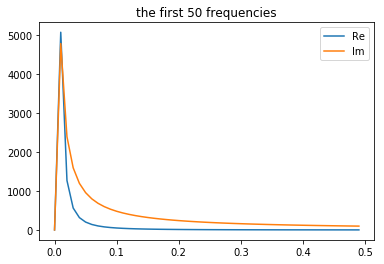

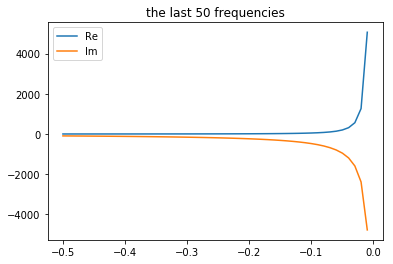

In [42]:
plt.figure()
plt.title('the first 50 frequencies')
plt.plot(freq[:50], y4_hat[:50].real, label='Re')
plt.plot(freq[:50], y4_hat[:50].imag, label='Im')
plt.legend(loc='best')

plt.figure()
plt.title('the last 50 frequencies')
plt.plot(freq[-50:], y4_hat[-50:].real, label='Re')
plt.plot(freq[-50:], y4_hat[-50:].imag, label='Im')
plt.legend(loc='best')

Now focus on the first and last `nf` frequencies.

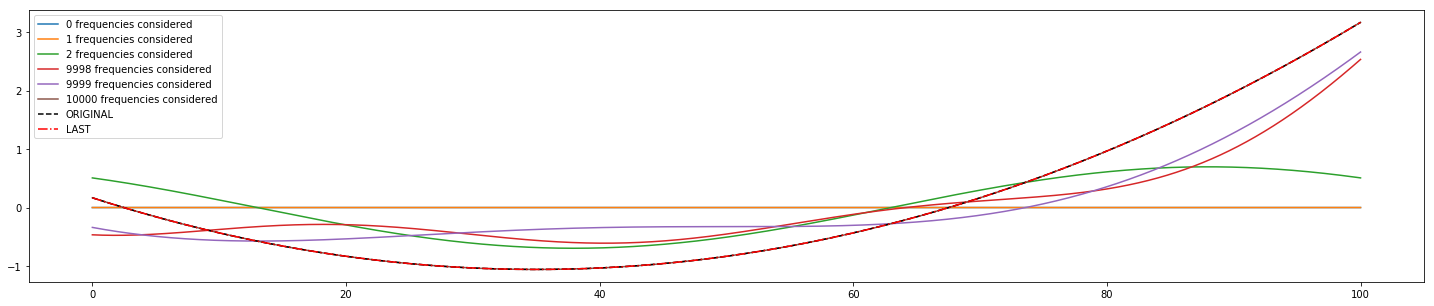

In [43]:
nf = 50

plt.figure(figsize=(25,5))
for i in range(N+1):
    if i > (nf-48) and i < N-(nf-48): continue
    y4_hat_tmp = y4_hat.copy()
    y4_hat_tmp[i:] = 0.
    y4_tmp = fftpack.ifft(y4_hat_tmp)
    y_last = y4_tmp
    plt.plot(x, y4_tmp.real, label='{} frequencies considered'.format(i))
plt.plot(x, y4_clean, color='k', linestyle='--', label='ORIGINAL')
plt.plot(x, y_last.real, color='r', linestyle='-.', label='LAST')
#plt.plot(x, np.fft.ifft(y4_hat).real, color='magenta', label='IFFT')
plt.legend(loc='best')

**Important takeaway**: the negative frequencies are important too, they are not just a mirroring of the positive ones (in fact the phase is flipped).

## Step 5: introducing noise
Use the same signal as above with some random noise on top

In [44]:
sampling = 0.1
x = np.arange(0,100,sampling)
y5 = (x**2 - 70*x - 50)/1000 + np.random.normal(loc=0, scale=0.1, size=x.shape[0])

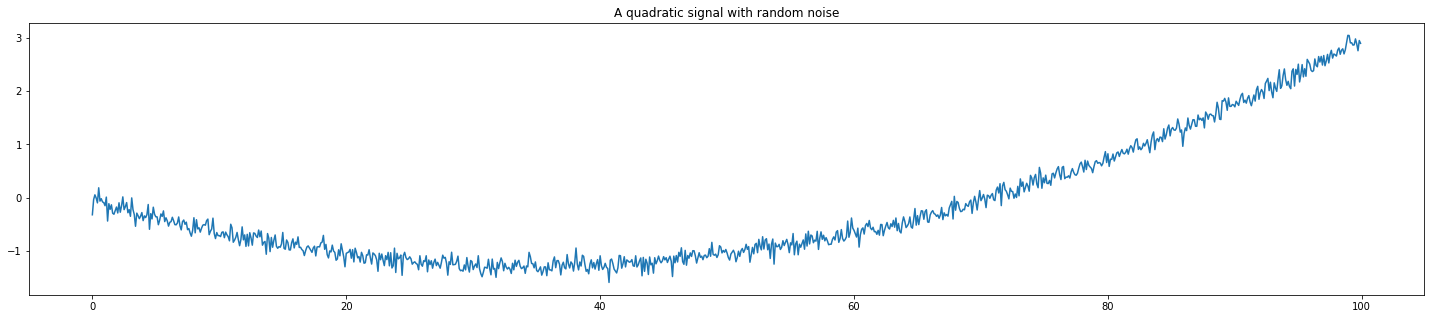

In [45]:
plt.figure(figsize=(25,5))
plt.title('A quadratic signal with random noise')
plt.plot(x, y5)

In [46]:
# remove offset
y5_clean = y5 - np.mean(y5)

In [47]:
y5_hat = np.fft.fft(y5_clean)
freq = np.fft.fftfreq(x.shape[0], sampling)

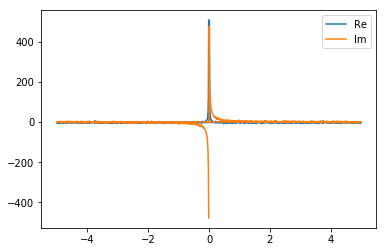

In [48]:
plt.figure('FFT')
plt.plot(freq, y5_hat.real, label='Re')
plt.plot(freq, y5_hat.imag, label='Im')
plt.legend(loc='best')

Filter out everything for |freq| > maxfreq

In [49]:
maxfreq = .5
y5_hat_filter = y5_hat.copy()
y5_hat_filter[ (np.abs(freq) > maxfreq) ] = 0

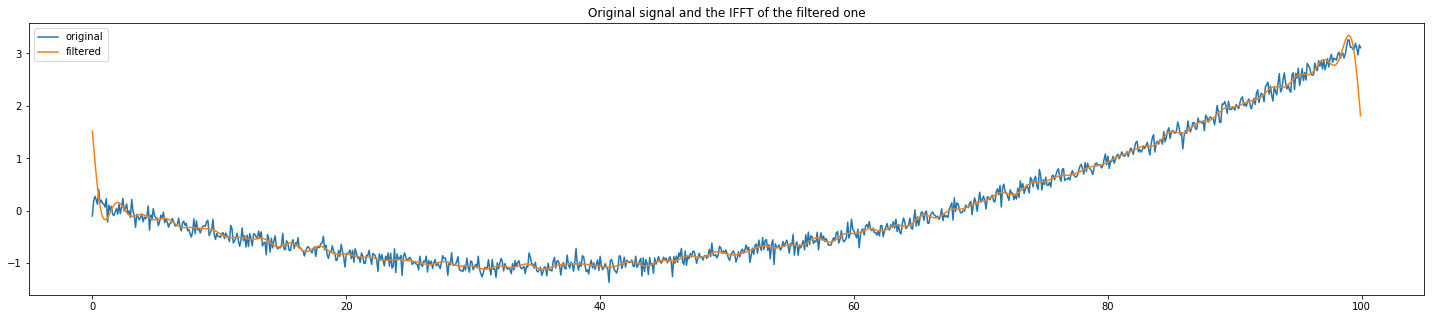

In [50]:
plt.figure(figsize=(25,5))
plt.title('Original signal and the IFFT of the filtered one')
plt.plot(x, y5_clean, label='original')
plt.plot(x, np.fft.ifft(y5_hat_filter).real, label='filtered')
plt.legend(loc='best')

The more frequencies are filtered out (i.e. the lower `maxfreq`) the less noise is included in the filtered signal :)

## Step 6: different kind of noises
Use the same example above (quadratic signal with random noise) plus some huge spikes here and there.

In [51]:
sampling = 0.1
x = np.arange(0,100,sampling)
spike = -5*np.exp(-(x-50)/2)
spike[ (x < 50) ] = 0
y6 = (x**2 - 70*x - 50)/1000 + np.random.normal(loc=0, scale=0.1, size=x.shape[0]) + spike

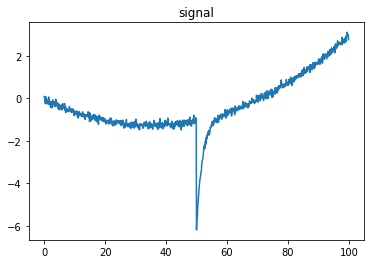

In [52]:
plt.figure()
plt.title('signal')
plt.plot(x, y6)

In [53]:
# remove the offset
y6_clean = y6 - np.mean(y6)

In [54]:
y6_hat = np.fft.fft(y6_clean)
freq = np.fft.fftfreq(x.shape[0], sampling)

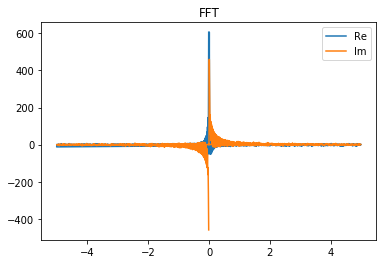

In [55]:
plt.figure()
plt.title('FFT')
plt.plot(freq, y6_hat.real, label='Re')
plt.plot(freq, y6_hat.imag, label='Im')
plt.legend(loc='best')

zoomed on 39 frequencies out of 1000


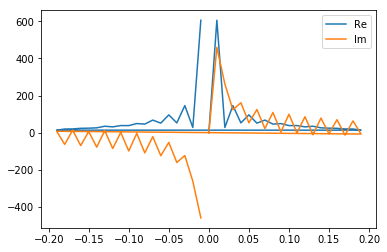

In [56]:
freq_zoom, y6_hat_zoom = getZoom(freq, y6_hat, -.2, .2)

plt.figure()
plt.plot(freq_zoom, np.abs(y6_hat_zoom.real), label='Re')
plt.plot(freq_zoom, y6_hat_zoom.imag, label='Im')
plt.legend(loc='best')

1000


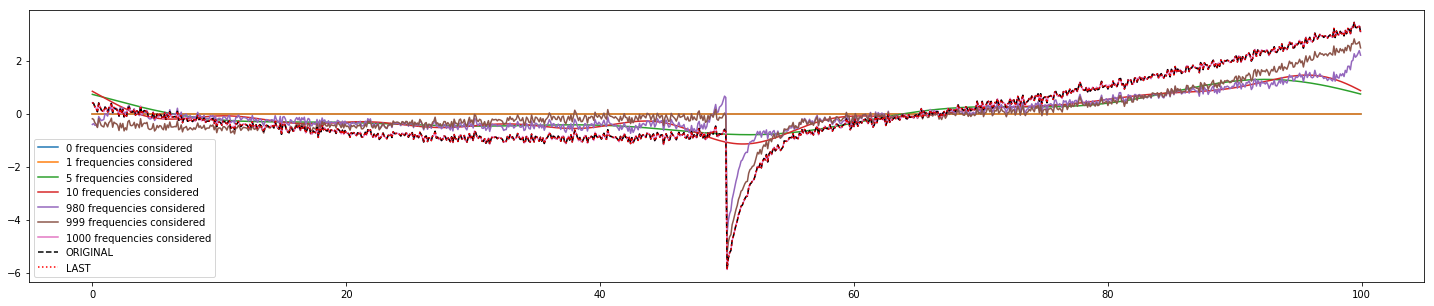

In [57]:
N = freq.shape[0]
print(N)

plt.figure(figsize=(25,5))
y_last = 0
interesting_steps = [0, 1, 5, 10, N-20, N-1, N]
for i in np.arange(0,N+1,1):
    if not i in interesting_steps: continue
    y6_hat_tmp = y6_hat.copy()
    y6_hat_tmp[i:] = 0.
    y6_tmp = fftpack.ifft(y6_hat_tmp)
    y_last = y6_tmp
    plt.plot(x, y6_tmp.real, label='{} frequencies considered'.format(i))
plt.plot(x, y6_clean, color='k', linestyle='--', label='ORIGINAL')
plt.plot(x, y_last.real, color='r', linestyle=':', label='LAST')
#plt.plot(x, np.fft.ifft(y6_hat).real, color='magenta', label='IFFT')
plt.legend(loc='best')

As before, the first and the last frequencies (i.e. N the closest to zero) are very important. Try to focus on those.  
Keep in mind that frequencies are stored in the `freq` array in a "strange" way: [0, f1, f2, ..., fn, -fn, ..., -f1]

1000


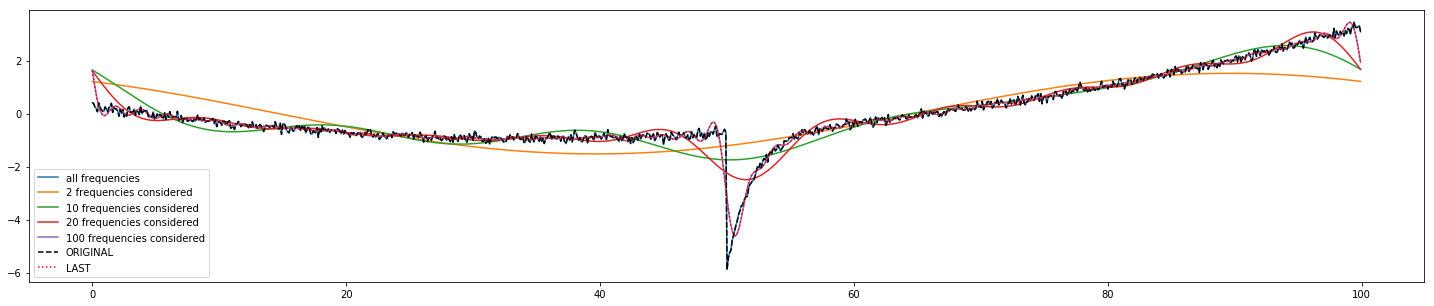

In [58]:
N = freq.shape[0]
print(N)

plt.figure(figsize=(25,5))
y_last = 0
interesting_steps = [0, 1, 5, 10, 50, N-20, N-1, N]
for i in range(N//2):
    if not i in interesting_steps: continue
    y6_hat_tmp = y6_hat.copy()
    y6_hat_tmp[i+1:-i] = 0. # i+1 because the first frequency is zero
    y6_tmp = fftpack.ifft(y6_hat_tmp)
    y_last = y6_tmp
    label = '{} frequencies considered'.format(2*i)
    if i==0: label = 'all frequencies'
    plt.plot(x, y6_tmp.real, label=label)
plt.plot(x, y6_clean, color='k', linestyle='--', label='ORIGINAL')
plt.plot(x, y_last.real, color='r', linestyle=':', label='LAST')
#plt.plot(x, np.fft.ifft(y6_hat).real, color='magenta', label='IFFT')
plt.legend(loc='best')

Summary of the findings in "Step 6"

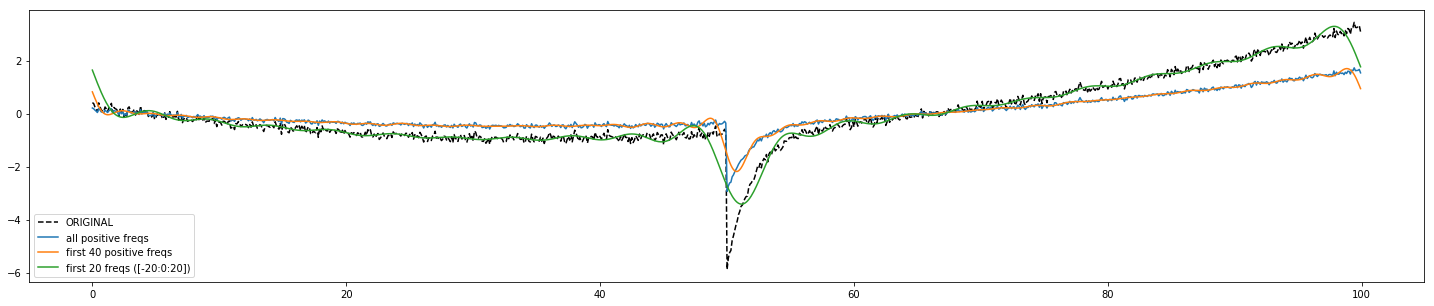

In [62]:
plt.figure(figsize=(25,5))

# consider only the positive freqs
y6_hat_all_pos = y6_hat.copy()
y6_hat_all_pos[N//2:] = 0.

# consider only the first Nf freqs
Nf = 40
y6_hat_fNf_pos = y6_hat.copy()
y6_hat_fNf_pos[N//2:] = 0.
y6_hat_fNf_pos[Nf+1:] = 0.

# consider the only the first Nf freqs on both sides
y6_hat_fNf_both = y6_hat.copy()
y6_hat_fNf_both[Nf//2 + 1:-Nf//2] = 0.

plt.plot(x, y6_clean, color='k', linestyle='--', label='ORIGINAL')
plt.plot(x, np.fft.ifft(y6_hat_all_pos).real, label='all positive freqs')
plt.plot(x, np.fft.ifft(y6_hat_fNf_pos).real, label='first {} positive freqs'.format(Nf))
plt.plot(x, np.fft.ifft(y6_hat_fNf_both).real, label='first {0} freqs ([-{0}:0:{0}])'.format(Nf//2))

plt.legend(loc='best')

It is better to consider a subset of positive and negative frequencies rather than considering all the positive ones.